# Machine Learning - Random Forest


## Exercícios

**1) Baseado em seus conhecimentos sobre Random Forest explique suas vantagens e desvantagens.**

* As vantagens são: 
*
- Pode ser utilizado tanto pra regressão quanto para classificação.
- Possui uma facil visualização devido as arvores pra entener o processo e a importancia de cada caracteristicas.
- Algoritmo facil devido ao seus autoparametros no modo defaut, obterem bons resultados, evitando uma maior complexidade, para obter previsões boas.
- Evita o sobreajuste, pois dependendo do numero de arvores escolhidas ficará mais dificil do modelo causar sobreajuste sobre os dados de treino.

* Desvantagens são:
*
- Se o algoritmo possuir um número grande de árvores pode torna-lo custoso computacionalmente para coloca-lo em produção.
- É uma ferramenta de modelagem preditiva e não descritiva. Isto significa que, se você está procurando uma descrição dos relacionamentos nos seus dados, você deve escolher outras abordagens que possuem uma estatistica descritiva e relacional dos dados.

**2) Explique de forma teórica:<br>**
* 2.1 - O que é Bootstrap Dataset ?
- O método de Bootstrap é uma técnica de reamostragem usada para estimar estatísticas em uma população amostrando um conjunto de dados com substituição. Pode ser usado para estimar estatísticas resumidas, como média ou desvio padrão. Calculando a média de estimativas de várias pequenas amostras de dados.

* 2.2 - Por que as árvores que compoem a floresta são diferentes?
- São diferentes devido a cada uma apresentar uma amostra de dados aleatória diferente, portanto cada arvore indica uma amostra de dados diferentes para treino do algoritmo, tendo assiom uma maior robustez na previsão, A previsão será feita por meio da soma dos resultados obtidos em cada árvore, indicando assim a maior soma a classe escolhida.

**3) Para que serve o parâmetro n_estimators do objeto RandomForestClassifier ?**
- Este parametro indica o número de árvores que será criada no modelo, portanto quanto mais arvores, mais robusto o resultado e maior o gasto computacional utilizado.

**4) É possível controlar o crescimento das árvores da floresta ?**

Sim é possivel controlar por meio do parametro max_deph, que indica a profundida da arvore.

**5) Utilizando o dataset iris.csv faça:**
* 5.1 - Carregue a base de dados e separe os dados e as classes em variáveis distintas.
* 5.2 - Treine um modelo baseado em Random Forest com um total de 20 árvores.
* 5.3 - Utilizando o código abaixo, faça as alterações necessárias para listar **objetos DecisionTreeClassifiers** e suas propriedades como **profundidade máxima** e **features importantes** utilizando o modelo treinado no item anterior (5.2).

In [6]:
# 5.1 - Carregue a base de dados e separe os dados e as classes em variáveis distintas.

import pandas as pd
import numpy as np 

data = pd.read_csv("iris.csv")


In [10]:
dados = data.drop("Species", axis=1)
classes = data.Species

In [15]:
# 5.2 - Treine um modelo baseado em Random Forest com um total de 20 árvores.

from sklearn.ensemble import RandomForestClassifier

iris_clf = RandomForestClassifier(n_estimators=20)
random_clf = iris_clf.fit(dados, classes)

In [16]:
# Utilizando o código abaixo, faça as alterações necessárias para listar **objetos DecisionTreeClassifiers** e 
# suas propriedades como **profundidade máxima** e **features importantes** utilizando o modelo treinado no item anterior (5.2).

for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))


Numero de nós: 27
Profundidade da árvore: 7
Features importantes: [0.53717525 0.17735968 0.07045089 0.21501419]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1280765244, splitter='best')

Numero de nós: 15
Profundidade da árvore: 6
Features importantes: [0.35990431 0.02894121 0.19882153 0.41233295]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min

**7) Baseado no conhecimento aprendido sobre os parâmetros min_samples_split, min_samples_leaf, max_depth e max_features para controlar o crescimento das árvores, faça: **

* Utilizando os códigos das células abaixo, utilize o DataFrame dfcancer para treinar um modelo RandomForestClassifiers com seus parametros padrão.
* Imprima os resultados de classificação utilizando Cross Validation.
* Utilize o GridSearchCV conforme aprendido nas aulas e descubra os melhores valores para os parametros min_samples_split, min_samples_leaf, max_depth e max_features.
* Treine novamente o modelo desta vez especificando os valores aos parametros e verifique novamente os resultados de classificação.

In [17]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import cross_val_predict

In [19]:
data = load_breast_cancer()


In [25]:
data = load_breast_cancer()
dfcancer = pd.DataFrame(data=data.data,columns=data.feature_names)
dfcancer['class'] = data.target
data.data = dfcancer.drop('class', axis = 1)

In [27]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [28]:
dfcancer_clf = RandomForestClassifier()
random_clf = iris_clf.fit(data.data, data.target)

In [32]:
from sklearn.metrics import classification_report

resultados_random = cross_val_predict(random_clf, data.data, data.target, cv=5)
print(classification_report(data.target,resultados_random))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       212
           1       0.96      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



In [33]:
from sklearn.model_selection import GridSearchCV

valores_estimators = [10, 20, 50, 100, 150]
valores_criterion = ['gini','entropy']
valores_max_depth = [10, 20, 50, 100]
valores_min_samples_split = [2, 5, 10,15]
valores_min_samples_leaf = [1, 5, 10,15]

In [34]:
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )

In [35]:
rf = RandomForestClassifier()

In [36]:
grid = GridSearchCV(rf, parametros_grid, cv=5, scoring='accuracy')

In [37]:
grid.fit(data.data,data.target)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [39]:
grid.best_score_

0.968390001552554

In [40]:
# Treine novamente o modelo desta vez especificando os valores aos parametros e verifique novamente os resultados de classificação.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.3,random_state=0)

In [41]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [42]:
y_train.shape,y_test.shape

((398,), (171,))

In [52]:
random_clf = RandomForestClassifier(criterion='entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
random_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
resultado = random_clf.predict(X_test)

In [55]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



* Utilizando o modelo treinado após o Tunning dos parametros liste as features mais importantes.
* Utilizando o código utilizado em aula renderize de forma gráfica as features e suas importâncias.
* Utilize apenas as features relevantes e treine novamente o modelo para verificar os resultados.

In [56]:
# Listantando as features mais importantes.

random_clf.feature_importances_

array([0.03647417, 0.0192628 , 0.04629   , 0.03195105, 0.00757263,
       0.01537849, 0.06284828, 0.12283286, 0.00650384, 0.00176264,
       0.02230191, 0.00550876, 0.01795781, 0.0222738 , 0.00459418,
       0.00581612, 0.00497933, 0.00556147, 0.00554228, 0.00504464,
       0.0854409 , 0.02733653, 0.13078764, 0.09739392, 0.01394468,
       0.01593176, 0.03944014, 0.11322484, 0.01441386, 0.01162867])

In [57]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [59]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

worst perimeter            0.130788
mean concave points        0.122833
worst concave points       0.113225
worst area                 0.097394
worst radius               0.085441
mean concavity             0.062848
mean perimeter             0.046290
worst concavity            0.039440
mean radius                0.036474
mean area                  0.031951
worst texture              0.027337
radius error               0.022302
area error                 0.022274
mean texture               0.019263
perimeter error            0.017958
worst compactness          0.015932
mean compactness           0.015378
worst symmetry             0.014414
worst smoothness           0.013945
worst fractal dimension    0.011629
mean smoothness            0.007573
mean symmetry              0.006504
compactness error          0.005816
concave points error       0.005561
symmetry error             0.005542
texture error              0.005509
fractal dimension error    0.005045
concavity error            0

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

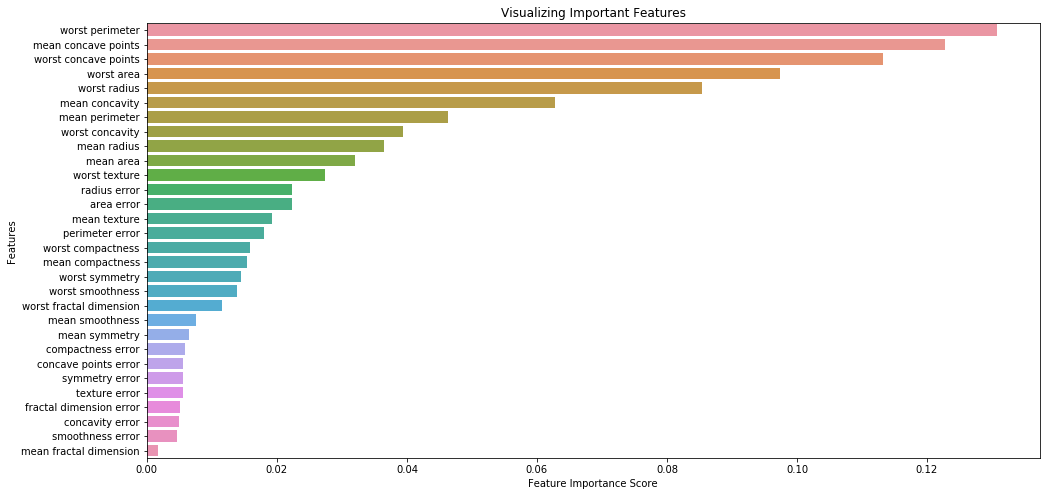

In [61]:
visualiza_features_importantes(feature_imp)

In [62]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

worst perimeter:	0.13078763910807917
mean concave points:	0.1228328619070699
worst concave points:	0.11322483797794947
worst area:	0.0973939220303472
worst radius:	0.08544089656785152
mean concavity:	0.06284827825316251
mean perimeter:	0.04629000310768269
worst concavity:	0.03944014051245629
mean radius:	0.036474166911883744
mean area:	0.031951052599858795


In [65]:
data.data[features_selecionadas]

,worst perimeter,mean concave points,worst concave points,worst area,worst radius,mean concavity,mean perimeter,worst concavity,mean radius,mean area
0,184.60,0.14710,0.2654,2019.0,25.380,0.30010,122.80,0.7119,17.99,1001.0
1,158.80,0.07017,0.1860,1956.0,24.990,0.08690,132.90,0.2416,20.57,1326.0
2,152.50,0.12790,0.2430,1709.0,23.570,0.19740,130.00,0.4504,19.69,1203.0
3,98.87,0.10520,0.2575,567.7,14.910,0.24140,77.58,0.6869,11.42,386.1
4,152.20,0.10430,0.1625,1575.0,22.540,0.19800,135.10,0.4000,20.29,1297.0
...,...,...,...,...,...,...,...,...,...,...
564,166.10,0.13890,0.2216,2027.0,25.450,0.24390,142.00,0.4107,21.56,1479.0
565,155.00,0.09791,0.1628,1731.0,23.690,0.14400,131.20,0.3215,20.13,1261.0
566,126.70,0.05302,0.1418,1124.0,18.980,0.09251,108.30,0.3403,16.60,858.1
567,184.60,0.15200,0.2650,1821.0,25.740,0.35140,140.10,0.9387,20.60,1265.0


In [66]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data[features_selecionadas],
    data.target,
    test_size=0.3,
    random_state=0
)

In [68]:
random_clf = RandomForestClassifier(criterion='entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)

In [69]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
resultado = random_clf.predict(X_test)
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.97      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

